**Homework: perturbed quantum mechanical oscillator**

**Alexandra Beikert, Pascal Huber, León-Alexander Hühn**

*(a) Determine the matrix form of $Q^4$ using*  
$$ Q_{nm} = \frac{1}{\sqrt 2} \left( \sqrt{n+1} \delta_{n,m-1} + \sqrt n \delta_{n,m+1}\right) $$  

Using the creation operator $a^\dagger$ and the annihilation operator $a$, $Q$ can be written as  
$$ Q = \frac{1}{\sqrt 2} (a^\dagger + a) $$  
Therefore, $Q^4$ is given by  
$ Q^4 = \frac{1}{4} \left[ a^4 + a^3a^\dagger + a^2a^\dagger a+a^2{a^\dagger}^2 + aa^\dagger a^2 + aa^\dagger aa^\dagger + a{a^\dagger}^2a + a{a^\dagger}^3 + a^\dagger a^3+a^\dagger a^2a^\dagger + a^\dagger a a^\dagger a + a^\dagger a {a^\dagger}^2 + {a^\dagger}^2 a^2 + {a^\dagger}^2 a^2 + {a^\dagger}^2 a a^\dagger + {a^\dagger}^3 a + a^4\right]$  
Using $a^\dagger a |n> = n|n>$ and $aa^\dagger |n> = (n+1)|n>$, one can calculate the matrix form  
$ <n|Q|m> = Q_{nm} = \frac{1}{4} \left[ \sqrt{m(m-1)(m-2)(m-3)}\delta_{n,m-4} + \left( (m+1)\sqrt{m/m-1)} + m \sqrt{m(m-1)} + (m-1)\sqrt{m(m-1)} + (m-2)\sqrt{m/m-1} \right) \delta_{n,m-2} + \left( (m+1)(m+2) + (m+1)^2 + m(m+1)+m^2+m(m-1)\right) \delta_{nm} + \left( (m+3)\sqrt{(m+1)(m+2)}+(m+2)\sqrt{(m+1)(m+2)}+(m+1)\sqrt{(m+1)(m+2)}+m\sqrt{(m+1)(m+2)}\right) \delta_{n,m+2} + \sqrt{(m+1)(m+2)(m+3)(m+4)} \delta_{n,m+4}\right]  
= \frac{1}{4} \left[ \sqrt{m(m-1)(m-2)(m-3)} \delta_{n,m-4} + \sqrt{m(m-1)}(4m-2)\delta_{n,m-2} + (5m^2+5m+3) \delta_{nm} + \sqrt{(m+1)(m+2)} (4m+6) \delta_{m+2} + \sqrt{(m+1)(m+2)(m+3)(m+4)} \delta_{n,m+4}\right]$

*(b) Compute the eigenvalues of $(h)_{nm}$ for the parameter $\lambda = 0.1$ as function of the matrix size ($N = 15...30$). Demonstrate that your program works properly, just listing the eigenvalues is not sufficient.*

In [1]:
# Import neccessary librarys
import numpy as np
import xalglib # Needs to be installed
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
# Parameter given by the task
lambda_ = 0.1

# Generates the matrix h_nm of the dimension NxN
def gen_matrix(N):
    # Generate numpy indices that work as a delta funcion
    n, m = np.indices((N,N))
    # Unperturbed oszillator
    h0 = (n + .5) * (n==m)
    # Q⁴ as given by a
    Q4 = .25 * (np.sqrt(m*(m-1)*(m-2)*(m-3))*(m-4==n)+np.sqrt(m*(m-1))*(4*m-2)*(m-2==n)+
                       (5*m**2+5*m+3)*(n==m)+np.sqrt((m+1)*(m+2))*(4*m+6)*(m+2==n)+
                        np.sqrt((m+1)*(m+2)*(m+3)*(m+4))*(n==m+4))
    # Final hamiltonian
    return (h0 + lambda_*Q4)

In [3]:
# Calculate the eigenvalues using the smatrixtd routine to get the tridiagonal form, and scipy to get the eigenvalues
def calc_eigv(N,n):
    _,_,d,e = xalglib.smatrixtd(gen_matrix(N).tolist(), N, True)
    eigenvalues, eigenvectors = la.eigh_tridiagonal(d,e)
    # Return only the first n eigenvalues
    return eigenvalues[0:n]

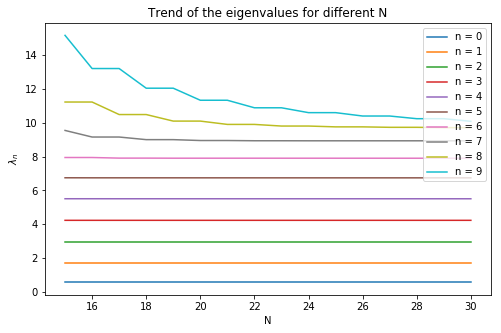

First 10 eigenvalues for N=30:  [ 0.55830221  1.71126955  2.95389513  4.23223753  5.50779044  6.74514491
  7.9053266   8.93584983  9.71564073 10.08821026]


In [4]:
# Amount of eigenvalues we are interested in
n = 10
# Range of N we are interested in
N_range = range(15,31)
values=np.zeros((n,len(N_range)))

# Get plot data
for N in N_range:
    values[:,N-15] = calc_eigv(N,n)

# Plot
plt.figure(figsize=(8,5))
plt.xlabel("N")
plt.ylabel("$\lambda_n$")
plt.title("Trend of the eigenvalues for different N")
for n in range(n):
    plt.plot(N_range, values[n,:], label="n = "+ str(n))
plt.legend()
plt.show()
print("First 10 eigenvalues for N=30: ", calc_eigv(30,10))

The plot shows that the eigenvalues of the perturbed oszillator are close to the unperturbed ones, as you would expect. For larger n, the eigenvalues obviously differ from the expected ones. They converge to the real values as $N \rightarrow \infty$. This is because the real physical system is reached for $N=\infty$

*(c) Calculate the eigenvalues analytically using the linearized form of the equation, i.e.consider only the terms on the diagonal.*

We consider only the diagonal elements of h, that means $(h)_{mm}$ . So we have a diagonal matrix. The eigenvalues are just the entries on the diagonal. The result is (as calculated above):

$\lambda_{m} = (m+\frac{1}{2})+\lambda_{param} \frac{1}{4} (5 m^2 + 5 m + 3)$

The first values are: $0.575, 1.825, 3.325, 5.075, 7.075, 9.325 ...$ with $\lambda_{param} = 0.1$

The first values are quite similar to the values at (b), but one can observe a larger increase.